In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
## Read Data from csv file
from data_loader import BaseDataLoader
import os

colnames = list(pd.read_csv(os.path.join("data", "train.csv")).columns)
X, y = BaseDataLoader(os.path.join("data", "train.csv"), colnames[1:], colnames[0]).get_data()

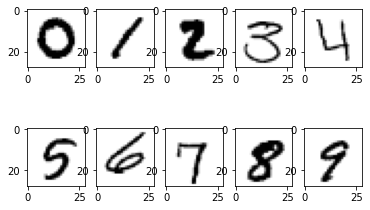

In [60]:
## Plot the data,
## TODO - Turn this into a function
indexes = {i : list(y[y["label"] == i].index)[0] for i in range(0, 10)}
data = [i[1] for i in X.iloc[list(indexes.values())].iterrows()]

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5)

ax1.imshow(data[0].values.reshape(28, 28), cmap = "gray_r")
ax2.imshow(data[1].values.reshape(28, 28), cmap = "gray_r")
ax3.imshow(data[2].values.reshape(28, 28), cmap = "gray_r")
ax4.imshow(data[3].values.reshape(28, 28), cmap = "gray_r")
ax5.imshow(data[4].values.reshape(28, 28), cmap = "gray_r")
ax6.imshow(data[5].values.reshape(28, 28), cmap = "gray_r")
ax7.imshow(data[6].values.reshape(28, 28), cmap = "gray_r")
ax8.imshow(data[7].values.reshape(28, 28), cmap = "gray_r")
ax9.imshow(data[8].values.reshape(28, 28), cmap = "gray_r")
ax10.imshow(data[9].values.reshape(28, 28), cmap = "gray_r")

Text(0, 0.5, 'Count of Occurences in training dataset')

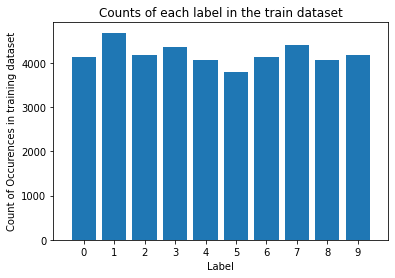

In [63]:
## We take a look at the records in the training dataset to see what the data is like

bins = np.arange(11) - 0.5
plt.hist(y, bins, rwidth = 0.8)
plt.xticks(range(10))
plt.xlim([-1, 10])
plt.title("Counts of each label in the train dataset")
plt.xlabel("Label")
plt.ylabel("Count of Occurences in training dataset")

In [95]:
## We'll whack it into a KNN first to give a baseline
## We're going to use PCA to reduce the dimension of the data, then a Neural Network
## Then we'll use an autoencoder.

In [76]:
## First we want to check some of the records, how many records, any na etc
print(f"Shape is {X.shape}")
print(f"Any Nan: {(X == np.nan).any().any()}")

Shape is (42000, 784)
Any Nan: False


In [78]:
## We'll use the test.csv as the test set and split the train set into train and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [83]:
## We'll use PCA to reduce the data
## We don't need to scale the data as all the features use the same range. 

pca = PCA(n_components = 784)
pc = pca.fit_transform(X_train)
print(f"Shape is {pc.shape}")

Shape is (29400, 784)


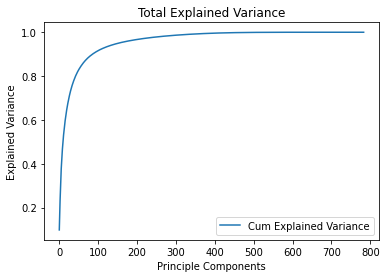

In [86]:
## We'll check how much of the variance is explained for each PC 
## Ideally we want to look for around 80% - 95% variance

plt.plot(np.cumsum(pca.explained_variance_ratio_), label = "Cum Explained Variance")
plt.xlabel("Principle Components")
plt.ylabel("Explained Variance")
plt.title("Total Explained Variance")
plt.legend()
plt.show()

In [91]:
total = np.cumsum(pca.explained_variance_ratio_) 
print(f" For 95% Variance Explainability {total[total <= 0.95].shape[0]} PCs")
print(f" For 90% Variance Explainability {total[total <= 0.9].shape[0]} PCs")
print(f" For 80% Variance Explainability {total[total <= 0.8].shape[0]} PCs")
print(f" For 50% Variance Explainability {total[total <= 0.5].shape[0]} PCs")

 For 95% Variance Explainability 152 PCs
 For 90% Variance Explainability 86 PCs
 For 80% Variance Explainability 42 PCs
 For 50% Variance Explainability 10 PCs


Text(0.5, 1.0, 'Scree Plot')

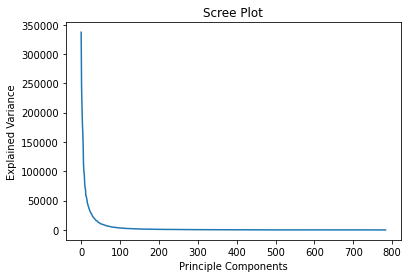

In [92]:
# We'll check a scree plot to too to see what we expect
# It looks like the number of PCs should be less than 100

plt.plot(pca.explained_variance_)
plt.xlabel("Principle Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot")

In [94]:
## We'll take 42 PCs as this will give us 80% variance explainability. 
no_of_components = 42
pca_X_train = PCA(n_components = no_of_components).fit_transform(X_train)
pca_X_test = PCA(n_components = no_of_components).fit_transform(X_test)

In [102]:
from sklearn.metrics import accuracy_score, f1_score

## We'll try fitting different values of K 

metrics = {}
for k in range(1,6):
    knn = KNeighborsClassifier(n_neighbors = k, weights = "uniform", algorithm = "auto", p = 2)
    knn.fit(pca_X_train, y_train.values)

    y_pred_train = knn.predict(pca_X_train)
    y_pred_test = knn.predict(pca_X_test)
    
    metrics[k] = (accuracy_score(y_train.values, y_pred_train),
                  f1_score(y_train.values, y_pred_train, average="weighted"),
                  accuracy_score(y_test.values, y_pred_test), 
                  f1_score(y_test.values, y_pred_test, average="weighted"))

/home/ojba/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ojba/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ojba/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ojba/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

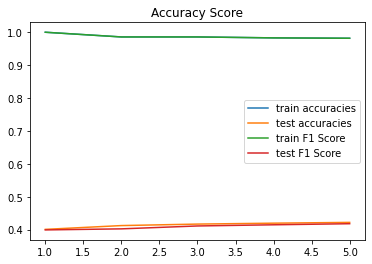

In [116]:
k_values = np.array(list(metrics.keys()))
train_accuracies = np.array([metrics[i][0] for i in metrics])
test_accuracies = np.array([metrics[i][2] for i in metrics])
train_f1 = np.array([metrics[i][1] for i in metrics])
test_f1 = np.array([metrics[i][3] for i in metrics])

plt.title("Accuracy Score")
plt.plot(k_values, train_accuracies, label = "train accuracies")
plt.plot(k_values, test_accuracies, label = "test accuracies")
plt.plot(k_values, train_f1, label = "train F1 Score")
plt.plot(k_values, test_f1, label = "test F1 Score")
plt.legend()
plt.show()


## Model is generally poor on this test (validation) set.

In [80]:
def calc_roc(pred_class, act_class): #This takes in a single col
    fpr, tpr, thresh = roc_curve(pred_class, act_class)
    return fpr, tpr

In [114]:
#TODO - OHE with the KNN to check ROC curve 
def gen_roc(y_train, pca_X_train, pca_X_test, y_test):
    y_train = pd.get_dummies(y_train)
    y_test = pd.get_dummies(y_test)
    roc_KNN = KNeighborsClassifier(n_neighbors = optimalN, weights = "distance", algorithm = "auto", p = optimalP)
    roc_KNN.fit(pca_X_train, y_train)
    roc_pred = roc_KNN.predict(pca_X_test)
    
    all_fpr = []
    all_tpr = []
    all_auc = []
    
    for i in range(0, 10):
        fpr, tpr = calc_roc(roc_pred[:, i], y_test[i])
        all_fpr.append(fpr)
        all_tpr.append(tpr)
        all_auc.append(auc(fpr, tpr))
    
    
    for i in range(0, 10):
        plt.plot(all_fpr[i], all_tpr[i])
    plt.plot([1, 0], [1, 0], "b--")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.title("Plotting ROC Curve")
    plt.show()   
    
    return all_fpr, all_tpr, all_auc

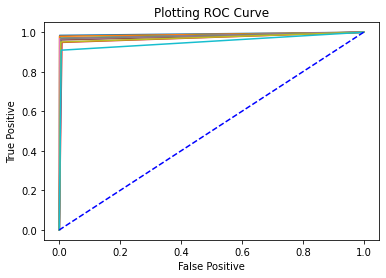

In [117]:
all_fpr, all_tpr, all_auc = gen_roc(y_train, pca_X_train, pca_X_test, y_test)

Text(0, 0.5, 'AUC')

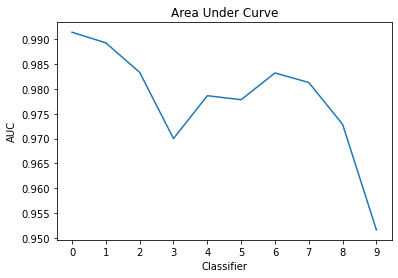

In [126]:
plt.plot(all_auc)
plt.xticks(range(0, 10))
plt.title("Area Under Curve")
plt.xlabel("Classifier")
plt.ylabel("AUC")

In [ ]:
##NN is best at classifying 0 and is worst at classifying a 9. 

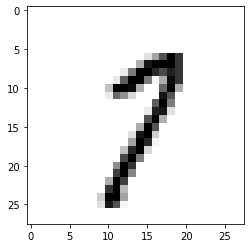

In [130]:
show_digit(X_test.iloc[5457])

In [131]:
from scipy.ndimage.interpolation import shift

In [132]:
A = X_test.iloc[5457]

In [133]:
A

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 20091, Length: 784, dtype: int64

In [136]:
A = np.array(A).reshape((28, 28))
A

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [141]:
s_A = shift(A, [10,10], cval = 0, mode = "constant")
s_A = s_A.reshape([-1])

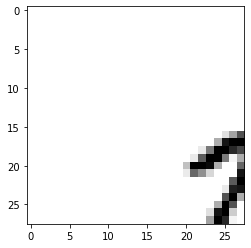

In [145]:
show_digit(pd.Series(s_A))